In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype

In [38]:
import pandas as pd

In [39]:
import os
for dirname , _ , filenames in os.walk('/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data'):
    for filename in filenames:
        print(os.path.join(dirname , filename))

/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/minuteIntensitiesWide_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/dailyActivity_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/sleepDay_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/heartrate_seconds_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/minuteIntensitiesNarrow_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/minuteMETsNarrow_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/hourlySteps_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/hourlyIntensities_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/dailyCalories_merged.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/hourlyCalories_merged.c

In [40]:
df = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/fitabase data/dailyActivity_merged.csv')

In [41]:
df.shape
df.columns
df.head()
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [42]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format="%m/%d/%Y")
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

In [51]:
df.columns = df.columns.str.lower()
df.rename(columns={
    'trackerdistance': 'tracker_distance',
    'activitydate': 'activity_date',
    'totalsteps': 'total_steps',
    'totaldistance': 'total_distance',
    'loggedactivitiesdistance': 'logged_activities_distance',
    'veryactivedistance': 'very_active_distance',
    'moderatelyactivedistance': 'moderately_active_distance',
    'lightactivedistance': 'light_active_distance',
    'sedentaryactivedistance': 'sedentary_active_distance',
    'veryactiveminutes': 'very_active_minutes',
    'fairlyactiveminutes': 'fairly_active_minutes',
    'lightlyactiveminutes': 'lightly_active_minutes',
    'sedentaryminutes': 'sedentary_minutes'
}, inplace=True)

print(df.columns)

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes', 'day_of_week', 'n_day_of_week'],
      dtype='object')


In [52]:
df['day_of_week'] = df['activity_date'].dt.day_name()
df['n_day_of_week'] = df['activity_date'].dt.weekday

In [53]:
print(df.isna().sum())
print(df.duplicated().sum())

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64
0


In [54]:
id_grp = df.groupby(['id'])
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False).to_frame()

In [65]:
conditions = [(id_avg_step['total_steps'] <= 6000),
    (id_avg_step['total_steps'] > 6000) & (id_avg_step['total_steps'] < 12000),
    (id_avg_step['total_steps'] >= 12000)]

values = ['sedentary', 'active', 'very_active']
id_avg_step['activity_level'] = np.select(conditions, values, default='unknown')

df['activity_level'] = df['id'].map(id_avg_step['activity_level'])

In [57]:
print('Number of unique values in id column:', df['id'].nunique())
print('\nList of id values:', df['id'].unique())
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())
print('The min date is:', df['activity_date'].min())
print('The max date is:', df['activity_date'].max())
print('The number of unique dates are:', df['activity_date'].nunique())
print(df.describe())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']
How many times each id appear in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160 

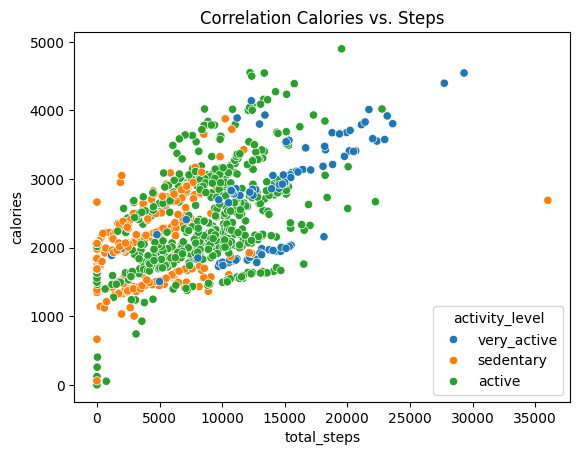

In [66]:
sns.scatterplot(x='total_steps', y='calories', data=df, hue='activity_level')
plt.title('Correlation Calories vs. Steps')
plt.show()

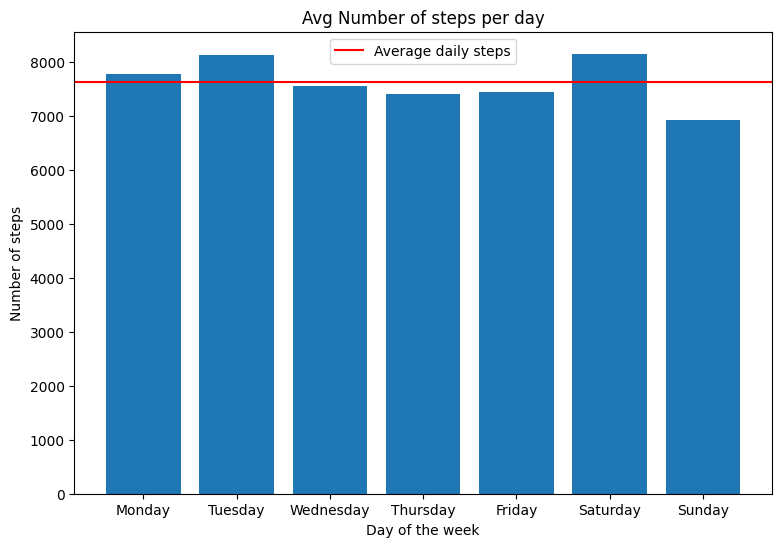

In [67]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(9, 6))
avg_daily_steps = df.groupby('day_of_week')['total_steps'].mean().reindex(day_of_week)
plt.bar(avg_daily_steps.index, avg_daily_steps)
ax.axhline(y=avg_daily_steps.mean(), color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')
plt.legend()
plt.show()

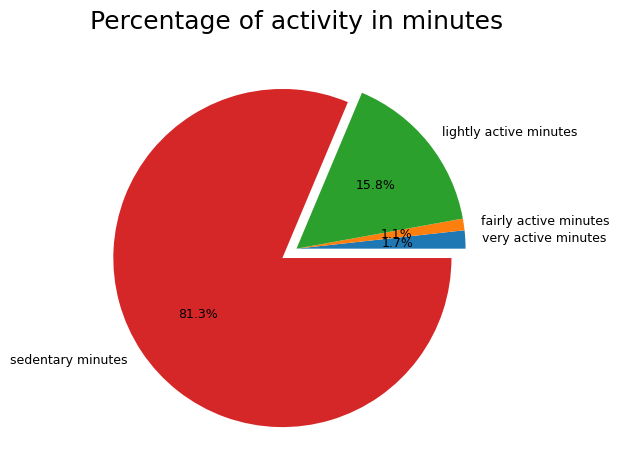

In [69]:
slices = [ df['very_active_minutes'].sum(),
    df['fairly_active_minutes'].sum(),
    df['lightly_active_minutes'].sum(),
    df['sedentary_minutes'].sum()]
labels = ['very active minutes', 'fairly active minutes', 'lightly active minutes', 'sedentary minutes']
explode = [0, 0, 0, 0.1]
plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%', textprops=dict(size=9))
plt.title('Percentage of activity in minutes', fontsize=18)
plt.tight_layout()
plt.show()

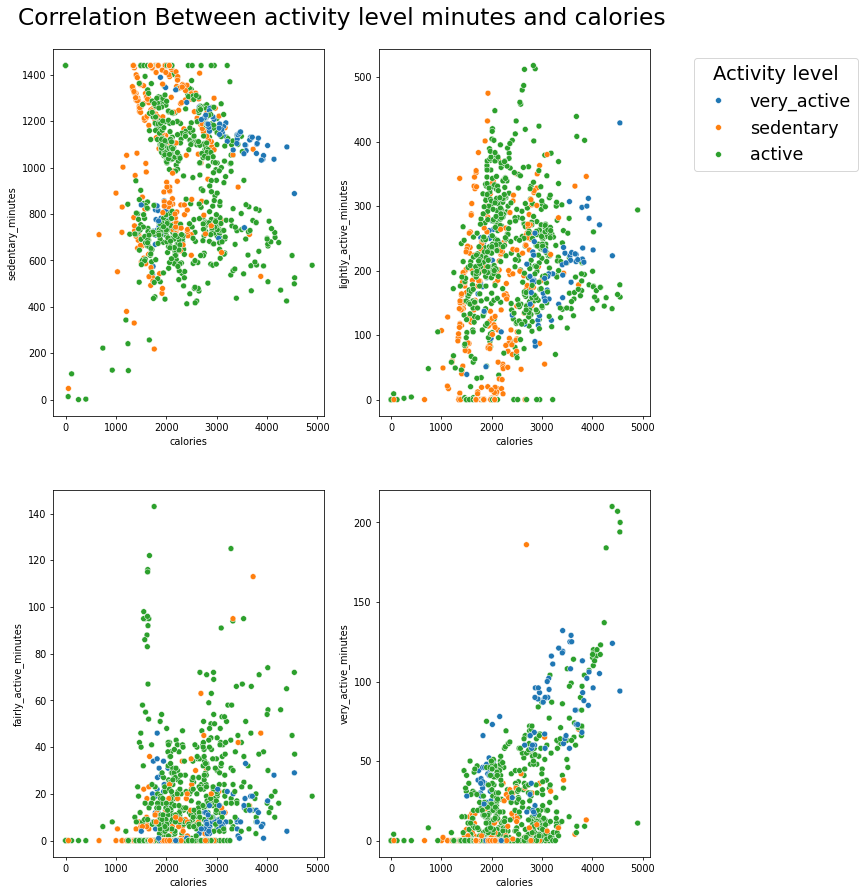

In [70]:
fig, axes = plt.subplots(2, 2, figsize=(11, 15), dpi=70)
sns.scatterplot(data=df, x='calories', y='sedentary_minutes', hue='activity_level', ax=axes[0, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='lightly_active_minutes', hue='activity_level', ax=axes[0, 1], legend=False)
sns.scatterplot(data=df, x='calories', y='fairly_active_minutes', hue='activity_level', ax=axes[1, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='very_active_minutes', hue='activity_level', ax=axes[1, 1])
plt.legend(title='Activity level', title_fontsize=20, bbox_to_anchor=(1.8, 2.2), fontsize=18, frameon=True, scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories', x=0.5, y=0.92, fontsize=24)
plt.show()